In [23]:
import os
import pickle
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from P02_MSIE.T10_2_exp.vrptw_v11 import VRPTW

CURRENT_DIR = os.getcwd()
print(f"Current Directory: {CURRENT_DIR}")
datetime_now = datetime.now().strftime("%Y%m%d_%H%M%S")
os.makedirs(f"{CURRENT_DIR}/_tmp", exist_ok=True)


Current Directory: c:\Users\admin\Coding\research\rl-meta-test\src\P02_MSIE\T10_2_exp


In [ ]:
folder = "R_20251115_164952"
it = 28010

In [25]:
with open(f"./save_models/{folder}/exp_{it:05d}.pkl", "rb") as f:
    exp = pickle.load(f)
exp.tail()

,action,reward,done,F,CR,MG,best_solution,convergence_rate,std_pop,total_iteration,best_trial_fitness,std_trial_fitness,patience_ratio,idx_iteration,patience_remaining,TimeLimit.truncated
202,"[0.018454025848805906, 0.019188049708902838, 0...",5.690393e-08,False,0.018454,0.019188,0.286699,0.515341,1.0,0.309571,2.03,0.515341,0.311692,0.03125,2029,50,False
203,"[0.009917802208065986, 0.19284304498553279, 0....",5.021754e-08,False,0.009918,0.192843,0.333921,0.515341,1.0,0.306036,2.04,0.515341,0.309732,0.02500,2039,40,False
204,"[0.003988331836462021, 0.00479352293074131, 0....",4.431682e-08,False,0.003988,0.004794,0.423831,0.515341,1.0,0.329358,2.05,0.515341,0.329358,0.01875,2049,30,False
205,"[0.023722040289640426, 0.03404254093110562, 0....",3.910946e-08,False,0.023722,0.034043,0.491207,0.515341,1.0,0.311254,2.06,0.515341,0.310461,0.01250,2059,20,False
206,"[0.011789786566495895, 0.009985482605397701, 0...",3.451397e-08,False,0.011790,0.009985,0.529733,0.515341,1.0,0.316249,2.07,0.515341,0.316249,0.00625,2069,10,False


In [26]:
class RenamedUnpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'P02_MSIE.T12_exp' and name == 'VRPTW':
            # Return the new class definition
            return VRPTW
        # For all other cases, use the default behavior
        return super().find_class(module, name)

In [27]:
with open(f"./save_models/{folder}/vrp_{it:05d}.pkl", "rb") as f:
    unpickler = RenamedUnpickler(f)
    info = unpickler.load()

global_solution_history = info["global_solution_history"]
population = info["population"]
fitness_trial_history = info["fitness_trial_history"]
vrptw = info["vrptw"]
episode_reward = info["episode_reward"]
episode_length = info["episode_length"]
best_solution = info["best_solution"]
print(f"Episode Reward: {episode_reward}, Episode Length: {episode_length}, Best Solution: {best_solution}")

Episode Reward: 229.555504, Episode Length: 208, Best Solution: 0.5153408728999307


Best global solution: 0.5153408728999307


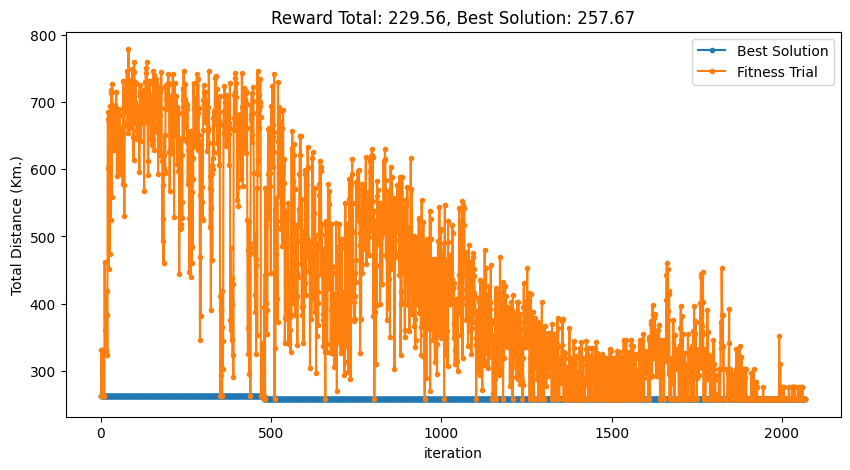

In [28]:
print(f"Best global solution: {min(global_solution_history)}")
# Plot results
fig, ax = plt.subplots(1, figsize=(10, 5))
x = np.arange(len(global_solution_history))
y1 = np.array(global_solution_history) * vrptw.solution_scale_factor
y2 = np.array(fitness_trial_history) * vrptw.solution_scale_factor
ax.plot(x, y1, marker=".", label="Best Solution")
ax.plot(x, y2, marker=".", label="Fitness Trial")
ax.set(
    xlabel="iteration",
    ylabel="Total Distance (Km.)",
    title=f"Reward Total: {episode_reward:.2f}, Best Solution: {best_solution*vrptw.solution_scale_factor:.2f}",
)
ax.legend()
fig.savefig(f"{CURRENT_DIR}/_tmp/plot_{datetime_now}_{it:05d}.png",
    dpi=300,
)


In [29]:
current_cost = [vrptw.objective_func(p) for p in population]
idx_min = np.argmin(current_cost)
print(current_cost[idx_min])

257.67043644996534


[0.4850219 , 0.46107857, 0.35311099, 0.4403681 , 0.33899793, 0.40565165,
 0.36144476, 0.36183772, 0.3759202 , 0.68005783, 0.36384064, 0.21889435,
 0.        , 0.1806433 , 0.13151103, 0.17445184, 0.64024643, 0.        ,
 0.08947138, 0.48511265, 0.63355345, 0.62620256, 0.57660718, 0.56454745,
 0.56594241, 0.65900464, 0.52450481, 0.40635442, 0.63920492, 0.64083804,
 0.50566045, 0.9878937 , 0.81658553, 0.76490789, 0.89412785, 0.34060784,
 0.56820716, 0.47235062, 0.44935418, 0.53568672, 0.20753963, 0.35353884,
 0.62293417, 0.39096919, 0.40659696, 0.5631624 , 0.54257329, 0.32328642,
 0.60455188, 0.54784437]


<Axes: >

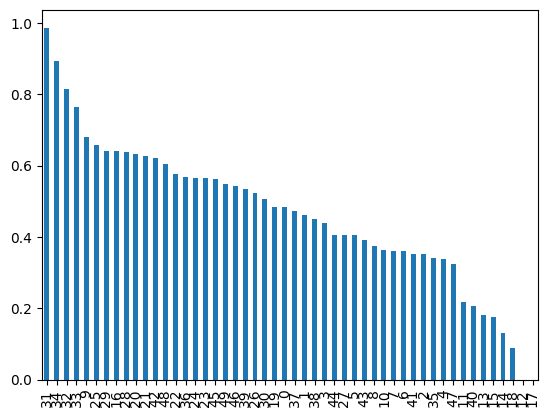

In [30]:
# How to visualize population
best_individual = population[idx_min]
string_representation = np.array2string(best_individual, separator=', ')
print(string_representation)
pd.Series(best_individual).sort_values(ascending=False).plot.bar()

In [31]:
vrptw.objective_func(population[idx_min])

257.67043644996534

In [32]:
exp.columns

Index(['action', 'reward', 'done', 'F', 'CR', 'MG', 'best_solution',
       'convergence_rate', 'std_pop', 'total_iteration', 'best_trial_fitness',
       'std_trial_fitness', 'patience_ratio', 'idx_iteration',
       'patience_remaining', 'TimeLimit.truncated'],
      dtype='object')

<Axes: >

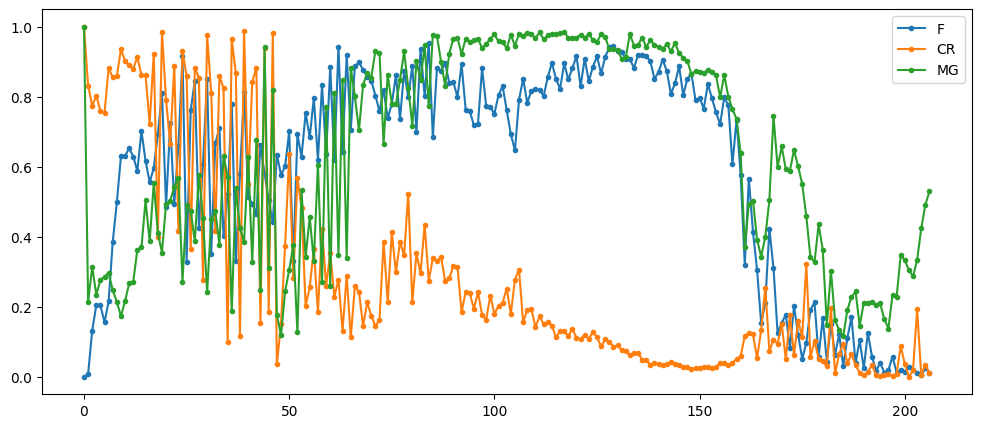

In [33]:
exp[["F", "CR", "MG"]].plot(figsize=(12,5), marker=".")